# Webscraping some stock market data and analysing it

## Scraping Daily FTSE 100 Data From London Stock Exchange Website

In [91]:
import requests
from bs4 import BeautifulSoup

In [92]:
# get website for the ftse 100
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [93]:
# check if access to website
requests.get(url)

<Response [200]>

#### Company code, name, currency, market cap, price, change, change %

In [94]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [95]:
# get all data
company_code = soup.find_all(class_='clickable bold-font-weight instrument-tidm gtm-trackable td-with-link')
company_name = soup.find_all(class_='clickable instrument-name gtm-trackable td-with-link')
company_currency = soup.find_all(class_='instrument-currency hide-on-landscape')
company_mc = soup.find_all(class_='instrument-marketcapitalization hide-on-landscape')
company_price = soup.find_all(class_='instrument-lastprice')
company_change = soup.find_all(class_='instrument-netchange hide-on-landscape positivechange')
company_p_change = soup.find_all(class_='instrument-percentualchange hide-on-landscape gtm-trackable')

In [96]:
# append to list
for x in range(len(company_code)):
    code.append(company_code[x].text)
    name.append(company_name[x].text)
    currency.append(company_currency[x].text)
    mc.append(company_mc[x].text)
    price.append(company_price[x].text)
    change.append(company_change[x].text)
    p_change.append(company_p_change[x].text)

In [97]:
# print data to check
print(code)
print(name)
print(len(code))
print(len(name))

['CRH', 'AHT', 'EXPN', 'FERG', 'ICP', 'CCH', 'RKT', 'MNG', 'CPG', 'WPP', 'SKG', 'NWG', 'SMDS', 'HSBA', 'SSE', 'LGEN', 'BARC', 'MRO', 'PRU', 'LLOY']
['CRH PLC ORD EUR 0.32 (CDI)', 'ASHTEAD GROUP PLC ORD 10P', 'EXPERIAN PLC ORD USD0.10', 'FERGUSON PLC ORD 10P', 'INTERMEDIATE CAPITAL GROUP PLC ORD 26 1/4P', 'COCA-COLA HBC AG ORD CHF6.70 (CDI)', 'RECKITT BENCKISER GROUP PLC ORD 10P', 'M&G PLC ORD £0.05', 'COMPASS GROUP PLC ORD 11 1/20P', 'WPP PLC ORD 10P', 'SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI)', 'NATWEST GROUP PLC ORD 100P', 'SMITH (DS) PLC ORD 10P', 'HSBC HLDGS PLC ORD $0.50 (UK REG)', 'SSE PLC ORD 50P', 'LEGAL & GENERAL GROUP PLC ORD 2 1/2P', 'BARCLAYS PLC ORD 25P', 'MELROSE INDUSTRIES PLC ORDS 160/21P', 'PRUDENTIAL PLC ORD 5P', 'LLOYDS BANKING GROUP PLC ORD 10P']
20
20


#### Now loop through all the pages

In [98]:
import re # add regex to as one of the classes slightly differ, so had to make sure it gets all of them

In [99]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [100]:
# create a function to scrape the data, which will be used over 5 different pages
def data_collection():
    # get all data
    company_code = soup.find_all(class_=re.compile('clickable bold-font-weight instrument-tidm gtm-trackable td-with-link'))
    company_name = soup.find_all(class_=re.compile('clickable instrument-name gtm-trackable td-with-link'))
    company_currency = soup.find_all(class_=re.compile('instrument-currency hide-on-landscape'))
    company_mc = soup.find_all(class_=re.compile('instrument-marketcapitalization hide-on-landscape'))
    company_price = soup.find_all(class_=re.compile('instrument-lastprice'))
    company_change = soup.find_all(class_=re.compile('instrument-netchange hide-on-landscape'))
    company_p_change = soup.find_all(class_=re.compile('instrument-percentualchange hide-on-landscape gtm-trackable'))

    # append to list
    for x in range(len(company_code)):
        code.append(company_code[x].text)
        name.append(company_name[x].text)
        currency.append(company_currency[x].text)
        mc.append(company_mc[x].text)
        price.append(company_price[x].text)
        change.append(company_change[x].text)
        p_change.append(company_p_change[x].text)

In [101]:
# find out how many pages to iterate over
list_of_pages = soup.find_all('a', class_='page-number')
print(len(list_of_pages))

5


In [102]:
# loop through each website page
n = 1 # start iteration at page 1

while n < len(list_of_pages) + 1:
    url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={n}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # run function to scrape
    data_collection()
    print(url)
    
    # count
    n += 1

https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=2
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=3
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=4
https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=5


In [103]:
# verify
print(len(code), len(change), len(name))
print(code)

100 100 100
['CRH', 'AHT', 'EXPN', 'FERG', 'ICP', 'CCH', 'RKT', 'MNG', 'CPG', 'WPP', 'SKG', 'NWG', 'SMDS', 'HSBA', 'SSE', 'LGEN', 'BARC', 'MRO', 'PRU', 'LLOY', 'ECM', 'III', 'RMV', 'MNDI', 'AV.', 'HL.', 'STJ', 'WTB', 'CRDA', 'LSEG', 'ADM', 'AVV', 'ABDN', 'ITRK', 'KGF', 'ULVR', 'PSN', 'IHG', 'SDR', 'STAN', 'SPX', 'EDV', 'PHNX', 'HWDN', 'BATS', 'NG.', 'JD.', 'BRBY', 'HLMA', 'BKG', 'SN.', 'SVT', 'UU.', 'SGRO', 'BNZL', 'SMIN', 'BA.', 'MGGT', 'BDEV', 'BME', 'REL', 'IMB', 'BT.A', 'RTO', 'DGE', 'LAND', 'INF', 'RMG', 'PSON', 'AVST', 'BP.', 'BLND', 'DPH', 'TW.', 'ABF', 'FLTR', 'NXT', 'AZN', 'SGE', 'AUTO', 'DCC', 'ENT', 'SMT', 'IAG', 'SHEL', 'GSK', 'AAF', 'SBRY', 'TSCO', 'VOD', 'FRES', 'PSH', 'HIK', 'RR.', 'ITV', 'AAL', 'ANTO', 'GLEN', 'RIO', 'OCDO']


#### Find out more information for each of the companies data extracted

By clicking on the name of each company, you can get: volume, turnover, earnings per share, issue date

In [104]:
# load up soup again as it changed from the loop
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [105]:
# get links for each company: you can get it by clicking on the name: the links have the code in them so use that
company_name_link = soup.find_all('a')

for link in company_name_link[200:240:2]:
    print(link.get('href'))

stock/CRH/crh-plc
stock/AHT/ashtead-group-plc
stock/EXPN/experian-plc
stock/FERG/ferguson-plc
stock/ICP/intermediate-capital-group-plc
stock/CCH/coca-cola-hbc-ag
stock/RKT/reckitt-benckiser-group-plc
stock/MNG/m-g-plc
stock/CPG/compass-group-plc
stock/WPP/wpp-plc
stock/SKG/smurfit-kappa-group-plc
stock/NWG/natwest-group-plc
stock/SMDS/smith-ds-plc
stock/HSBA/hsbc-holdings-plc
stock/SSE/sse-plc
stock/LGEN/legal-general-group-plc
stock/BARC/barclays-plc
stock/MRO/melrose-industries-plc
stock/PRU/prudential-plc
stock/LLOY/lloyds-banking-group-plc


In [106]:
tester = []
for x in links:
    print(x[6:].split('/'))
    tester.append(x[6:].split('/'))
    
for x in range(len(tester)):
    tester[x].remove(tester[0][1])

print(tester)

['CRH', 'crh-plc']
['CCH', 'coca-cola-hbc-ag']
['EXPN', 'experian-plc']
['AHT', 'ashtead-group-plc']
['LLOY', 'lloyds-banking-group-plc']
['MNG', 'm-g-plc']
['ICP', 'intermediate-capital-group-plc']
['FERG', 'ferguson-plc']
['BARC', 'barclays-plc']
['MRO', 'melrose-industries-plc']
['SSE', 'sse-plc']
['RKT', 'reckitt-benckiser-group-plc']
['LGEN', 'legal-general-group-plc']
['MNDI', 'mondi-plc']
['HSBA', 'hsbc-holdings-plc']
['SMDS', 'smith-ds-plc']
['SKG', 'smurfit-kappa-group-plc']
['NWG', 'natwest-group-plc']
['STAN', 'standard-chartered-plc']
['KGF', 'kingfisher-plc']
['ECM', 'electrocomponents-plc']
['CPG', 'compass-group-plc']
['JD.', 'jd-sports-fashion-plc']
['LSEG', 'london-stock-exchange-group-plc']
['BRBY', 'burberry-group-plc']
['ABDN', 'abrdn-plc']
['HL.', 'hargreaves-lansdown-plc']
['ADM', 'admiral-group-plc']
['AVV', 'aveva-group-plc']
['WTB', 'whitbread-plc']
['III', '3i-group-plc']
['SDR', 'schroders-plc']
['IHG', 'intercontinental-hotels-group-plc']
['EDV', 'endeavour-

IndexError: list index out of range

#### Now loop through all the pages

In [248]:
# empty array of links
links = []
n = 0

In [249]:
def more_data_collection():
    # loop through each name in the list obtained and find the corresponding link on its page
    company_name_link = soup.find_all('a')

    for link in company_name_link[200:240:2]:
        links.append(link.get('href'))

In [250]:
# loop through each website page
while n < len(list_of_pages) + 1:
    url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={n}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # run function to scrape
    more_data_collection()
    
    n += 1

In [251]:
print(len(links))

120


In [252]:
# remove any duplicates
links = list(dict.fromkeys(links))
len(links)

100

#### now that a list of the links have all been collected, use the links to get the relevant information

In [253]:
# list of new variables
volume, turnover, eps, issue_date, date = ([] for i in range(5))

In [254]:
# get page of each link
n = 0
url = f'https://www.londonstockexchange.com/{links[n]}'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [255]:
print(url)

https://www.londonstockexchange.com/stock/CRH/crh-plc


In [256]:
# get relevant parameters for the variables list
company_volume = soup.find(id='chart-table') # can only use id because of javascript

In [257]:
# get relevant parameters for the variables list
# can only use id because of javascript, changing values: navigating down the tree
company_volume = soup.select('#chart-table > div > div:nth-child(2) > .index-item ') # gets what I need: change last number to navigate to different values
for x in company_volume:
    print(f'{x.text}\n')

 Open price 3,103.50

 Previous close price / date 3,215.50 / 20 April 2022

 Volume 2,613,358

 Turnover (on book) £41,547,625.27

 Market Main Market

 Instrument market cap (£m) 23,131.66

 Earnings per share 3.29

 Issue date 08 July 2005

 ISIN IE0001827041

 SEDOL 0182704

 Market identifier code (MIC) XLON

 Country of share register IE

 Market segment SET1

 Trading service SETS



In [258]:
company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
print(company_volume)

company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
print(company_eps)

company_turnover =  soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
print(company_turnover)

company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]
company_issue_date = ' '.join(company_issue_date)
print(company_issue_date)

date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
for x in date_of_stock_data:
    print(x.text)

2,613,358
3.29
£41,547,625.27
08 July 2005
20.04.22 17:50:36


#### loop for every link in list

In [259]:
def variables():
    company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
    volume.append(company_volume)

    company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
    eps.append(company_eps)

    company_turnover =  soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
    turnover.append(company_turnover)

    company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]
    company_issue_date = ' '.join(company_issue_date)
    issue_date.append(company_issue_date)
    
    date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
    for x in date_of_stock_data:
        date.append(x.text)

In [260]:
for link in links:
    url = f'https://www.londonstockexchange.com/{link}'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    variables()
    
print('Data collected!')

Data collected!


In [261]:
print(len(volume))

100


#### Move lists to dataframe

In [290]:
import pandas as pd

In [291]:
df = pd.DataFrame({'Date':date, 'Code':code, 'Company Name':name, 'Currency': currency, 'Market Cap (million)': mc, 'Price': price, 'Change':change, 'Percentage Change':p_change, 'Volume':volume, 'Turnover':turnover, 'Earnings Per Share':eps, 'Issue Date':issue_date })

In [292]:
df.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,20.04.22 17:50:38,CRH,CRH PLC ORD EUR 0.32 (CDI),GBX,"23,131.66","3,215.50",178.50,5.88%,"2,613,358","£41,547,625.27",3.29,08 July 2005
1,20.04.22 17:50:39,AHT,ASHTEAD GROUP PLC ORD 10P,GBX,"20,327.89","4,776.00",184.00,4.01%,"1,406,434","£41,923,776.73",1.56,19 September 2005
2,20.04.22 17:50:40,EXPN,EXPERIAN PLC ORD USD0.10,GBX,"25,258.44","2,817.00",106.00,3.91%,"4,404,518","£37,581,129.05",0.88,11 October 2006
3,20.04.22 17:50:41,FERG,FERGUSON PLC ORD 10P,GBX,"21,720.94","10,610.00",360.00,3.51%,"1,073,110","£79,753,959.83",6.75,10 May 2019
4,20.04.22 17:50:42,ICP,INTERMEDIATE CAPITAL GROUP PLC ORD 26 1/4P,GBX,"4,914.70","1,668.00",53.50,3.31%,"762,212","£8,951,320.07",1.60,01 August 2016


In [293]:
# Clean data
df['Percentage Change'] = df['Percentage Change'].str.replace('%','')
df['Turnover'] = df['Turnover'].str.replace('£','')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-04-20,CRH,CRH PLC ORD EUR 0.32 (CDI),GBX,"23,131.66","3,215.50",178.50,5.88,"2,613,358","41,547,625.27",3.29,08 July 2005
1,2022-04-20,AHT,ASHTEAD GROUP PLC ORD 10P,GBX,"20,327.89","4,776.00",184.00,4.01,"1,406,434","41,923,776.73",1.56,19 September 2005
2,2022-04-20,EXPN,EXPERIAN PLC ORD USD0.10,GBX,"25,258.44","2,817.00",106.00,3.91,"4,404,518","37,581,129.05",0.88,11 October 2006
3,2022-04-20,FERG,FERGUSON PLC ORD 10P,GBX,"21,720.94","10,610.00",360.00,3.51,"1,073,110","79,753,959.83",6.75,10 May 2019
4,2022-04-20,ICP,INTERMEDIATE CAPITAL GROUP PLC ORD 26 1/4P,GBX,"4,914.70","1,668.00",53.50,3.31,"762,212","8,951,320.07",1.60,01 August 2016


In [294]:
df['Date'].dtype

dtype('<M8[ns]')

In [295]:
# Remove the '-' from the change and p change column
df['Change'][64]

' 6.00 '

In [296]:
df['Change'] = df['Change'].replace([' - '],'0')
df['Percentage Change'] = df['Percentage Change'].replace([' - '],'0')

In [297]:
# the negative signs in earnings per share causing problems with conversion to float
import numpy as np

df['Earnings Per Share'] = df['Earnings Per Share'].replace('-',np.nan)

In [298]:
# Change datatype of all strings that look like numbers to actual numbers
df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']] = df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']].apply(lambda x: x.str.replace(',','').astype(float))
df

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-04-20,CRH,CRH PLC ORD EUR 0.32 (CDI),GBX,23131.66,3215.5,178.5,5.88,2613358.0,4.154763e+07,3.29,08 July 2005
1,2022-04-20,AHT,ASHTEAD GROUP PLC ORD 10P,GBX,20327.89,4776.0,184.0,4.01,1406434.0,4.192378e+07,1.56,19 September 2005
2,2022-04-20,EXPN,EXPERIAN PLC ORD USD0.10,GBX,25258.44,2817.0,106.0,3.91,4404518.0,3.758113e+07,0.88,11 October 2006
3,2022-04-20,FERG,FERGUSON PLC ORD 10P,GBX,21720.94,10610.0,360.0,3.51,1073110.0,7.975396e+07,6.75,10 May 2019
4,2022-04-20,ICP,INTERMEDIATE CAPITAL GROUP PLC ORD 26 1/4P,GBX,4914.70,1668.0,53.5,3.31,762212.0,8.951320e+06,1.60,01 August 2016
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-20,AAL,ANGLO AMERICAN PLC ORD USD0.54945,GBX,55756.94,4035.5,-119.5,-2.88,11273235.0,1.221291e+08,1.69,02 July 2007
96,2022-04-20,ANTO,ANTOFAGASTA PLC ORD 5P,GBX,16527.89,1636.0,-51.0,-3.02,2829471.0,2.215993e+07,0.51,08 March 2004
97,2022-04-20,GLEN,GLENCORE PLC ORD USD0.01,GBX,69353.60,518.9,-16.7,-3.12,47709712.0,1.308893e+08,-0.14,19 May 2011
98,2022-04-20,RIO,RIO TINTO PLC ORD 10P,GBX,77601.30,5850.0,-292.0,-4.75,5350560.0,1.816995e+08,13.03,13 January 2006


In [299]:
# Create new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [300]:
# change issue date to datetime format
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [301]:
daily_FTSE = df
daily_FTSE.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-04-20,CRH,CRH PLC ORD EUR 0.32 (CDI),GBX,23131.66,3215.5,178.5,5.88,2613358.0,41547625.27,3.29,2005-07-08,20,4,2022
1,2022-04-20,AHT,ASHTEAD GROUP PLC ORD 10P,GBX,20327.89,4776.0,184.0,4.01,1406434.0,41923776.73,1.56,2005-09-19,20,4,2022
2,2022-04-20,EXPN,EXPERIAN PLC ORD USD0.10,GBX,25258.44,2817.0,106.0,3.91,4404518.0,37581129.05,0.88,2006-10-11,20,4,2022
3,2022-04-20,FERG,FERGUSON PLC ORD 10P,GBX,21720.94,10610.0,360.0,3.51,1073110.0,79753959.83,6.75,2019-05-10,20,4,2022
4,2022-04-20,ICP,INTERMEDIATE CAPITAL GROUP PLC ORD 26 1/4P,GBX,4914.70,1668.0,53.5,3.31,762212.0,8951320.07,1.60,2016-08-01,20,4,2022


In [302]:
# get the name without the codes at the end
def rename(link):
    semi_cleaned_name = link[6:]
    x = semi_cleaned_name.find('/') + 1
    cleaned_name = semi_cleaned_name[x:].replace('-', ' ').title()
    return cleaned_name

In [303]:
pd.DataFrame([rename(x) for x in links])

,0
0,Crh Plc
1,Ashtead Group Plc
2,Experian Plc
3,Ferguson Plc
4,Intermediate Capital Group Plc
...,...
95,Anglo American Plc
96,Antofagasta Plc
97,Glencore Plc
98,Rio Tinto Plc


In [304]:
daily_FTSE['Company Name'] = pd.DataFrame([rename(x) for x in links])
daily_FTSE.head(5)

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-04-20,CRH,Crh Plc,GBX,23131.66,3215.5,178.5,5.88,2613358.0,41547625.27,3.29,2005-07-08,20,4,2022
1,2022-04-20,AHT,Ashtead Group Plc,GBX,20327.89,4776.0,184.0,4.01,1406434.0,41923776.73,1.56,2005-09-19,20,4,2022
2,2022-04-20,EXPN,Experian Plc,GBX,25258.44,2817.0,106.0,3.91,4404518.0,37581129.05,0.88,2006-10-11,20,4,2022
3,2022-04-20,FERG,Ferguson Plc,GBX,21720.94,10610.0,360.0,3.51,1073110.0,79753959.83,6.75,2019-05-10,20,4,2022
4,2022-04-20,ICP,Intermediate Capital Group Plc,GBX,4914.70,1668.0,53.5,3.31,762212.0,8951320.07,1.60,2016-08-01,20,4,2022


### Use this daily data to do  analysis as well as build a database of each day by inputting this dataset into SQL which will update everyday and can be used to create a time series of the daily data

In [305]:
import pyodbc # sql
from sqlalchemy import create_engine # sql to insert df to sql
import urllib # for sql too

SERVER_NAME = 'DESKTOP-GR6T3L7'
DATABASE_NAME = 'stocks'

# connection string
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + SERVER_NAME + '; \
                       DATABASE=' + DATABASE_NAME + '; \
                       Trusted_Connection=yes')

# cursor to extract data
cursor = conn.cursor()

# Use this to connect for saving data
quoted = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER='+SERVER_NAME+'; \
                       DATABASE='+DATABASE_NAME+'; \
                       Trusted_Connection=yes')

In [138]:
# save the dataset into SQL database
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
daily_FTSE.to_sql('daily_FTSE', schema='dbo', con=engine, if_exists='append')
print('Dataset appended.')

Dataset appended.


##### Use SQL dataset to analyse

In [306]:
query = """SELECT * FROM [dbo].[daily_FTSE]"""
result = pd.read_sql(query, conn)
result

,index,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,0,2022-04-18,IHG,Intercontinental Hotels Group Plc,GBX,9175.05,5192.00,206.00,4.13,859263.0,2.269436e+07,1.45,2019-01-14,18.0,4.0,2022.0
1,1,2022-04-18,RR.,Rolls Royce Holdings Plc,GBX,7533.35,93.43,3.40,3.78,53922130.0,3.360236e+07,-0.53,2011-05-23,18.0,4.0,2022.0
2,2,2022-04-18,IAG,International Consolidated Airlines Group S A,GBX,6967.59,145.48,5.18,3.69,25606326.0,2.322539e+07,-1.96,2011-02-02,18.0,4.0,2022.0
3,3,2022-04-18,WTB,Whitbread Plc,GBX,5680.74,2915.00,103.00,3.66,2633231.0,1.901871e+07,-4.82,2007-01-08,18.0,4.0,2022.0
4,4,2022-04-18,LAND,Land Securities Group Plc,GBX,5549.30,770.80,22.40,2.99,2057500.0,1.277107e+07,-1.88,2017-09-28,18.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,95,2022-04-20,AAL,Anglo American Plc,GBX,55756.94,4035.50,-119.50,-2.88,10950647.0,1.221291e+08,1.69,2007-07-02,NaN,NaN,NaN
396,96,2022-04-20,ANTO,Antofagasta Plc,GBX,16527.89,1636.00,-51.00,-3.02,2817822.0,2.215993e+07,0.51,2004-03-08,NaN,NaN,NaN
397,97,2022-04-20,GLEN,Glencore Plc,GBX,69353.60,518.90,-16.70,-3.12,46948101.0,1.308893e+08,-0.14,2011-05-19,NaN,NaN,NaN
398,98,2022-04-20,RIO,Rio Tinto Plc,GBX,77601.30,5850.00,-292.00,-4.75,5104438.0,1.816995e+08,13.03,2006-01-13,NaN,NaN,NaN


In [307]:
# close cursor and remove conn
cursor.close()
conn.close()

### Analysis

##### What are the top five companies by market cap today

In [308]:
# to make sure to filter today
today = pd.Timestamp.today().strftime('%Y-%m-%d')
today

'2022-04-20'

In [309]:
top_5_mc = result.pivot_table('Market Cap (million)', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Market Cap (million)'], ascending=[False]).reset_index()
top_5_mc = top_5_mc[top_5_mc['Date'] == today].head(5)

In [310]:
top_5_mc

,Company Name,Date,Market Cap (million)
1,Shell Plc,2022-04-20,165015.10
3,Astrazeneca Plc,2022-04-20,163250.46
7,Hsbc Holdings Plc,2022-04-20,105255.76
10,Diageo Plc,2022-04-20,91316.55
14,Glaxosmithkline Plc,2022-04-20,90137.51


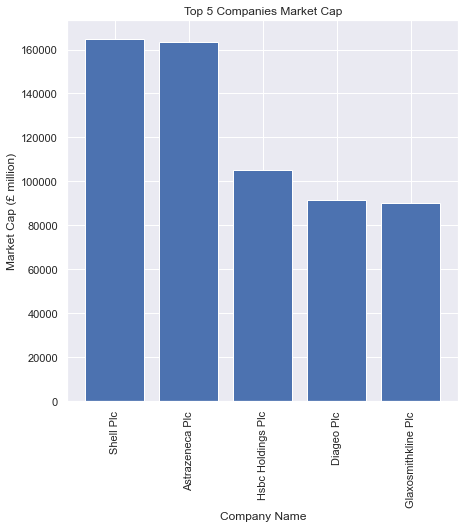

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set_theme()

# plot a bar chart
plt.figure(figsize=(7,7))

mc_x = top_5_mc['Company Name']
mc_y = top_5_mc['Market Cap (million)']

plt.xlabel('Company Name')
plt.ylabel('Market Cap (£ million)')
plt.title('Top 5 Companies Market Cap')

plt.xticks(rotation=90)

plt.bar(mc_x, mc_y)
plt.show()

##### Daily price chart for the top 5 market cap companies today

In [312]:
# 5 companies that are top market cap today
top_5_mc['Company Name']

1               Shell Plc
3         Astrazeneca Plc
7       Hsbc Holdings Plc
10             Diageo Plc
14    Glaxosmithkline Plc
Name: Company Name, dtype: object

In [313]:
daily_chart = result[['Date', 'Company Name', 'Price']]
daily_chart = daily_chart[daily_chart['Company Name'].isin(top_5_mc['Company Name'])].reset_index()
daily_chart.drop("index", axis=1, inplace=True)
daily_chart

,Date,Company Name,Price
0,2022-04-18,Diageo Plc,3963.5
1,2022-04-18,Hsbc Holdings Plc,522.4
2,2022-04-18,Shell Plc,2192.0
3,2022-04-18,Astrazeneca Plc,10536.0
4,2022-04-18,Glaxosmithkline Plc,1773.0
5,2022-04-19,Shell Plc,2228.0
6,2022-04-19,Hsbc Holdings Plc,525.6
7,2022-04-19,Astrazeneca Plc,10500.0
8,2022-04-19,Glaxosmithkline Plc,1759.6
9,2022-04-19,Diageo Plc,3867.5


In [314]:
# pivot data to plot by company by tranposing data
daily_plot = daily_chart.pivot_table('Price', 'Date' , ['Company Name'])
daily_plot

Company Name,Astrazeneca Plc,Diageo Plc,Glaxosmithkline Plc,Hsbc Holdings Plc,Shell Plc
Date,,,,,
2022-04-18,10536.0,3963.5,1773.0,522.4,2192.0
2022-04-19,10500.0,3867.5,1759.6,525.6,2228.0
2022-04-20,10470.0,3873.5,1740.8,538.0,2208.0


Text(0, 0.5, 'Price (£)')

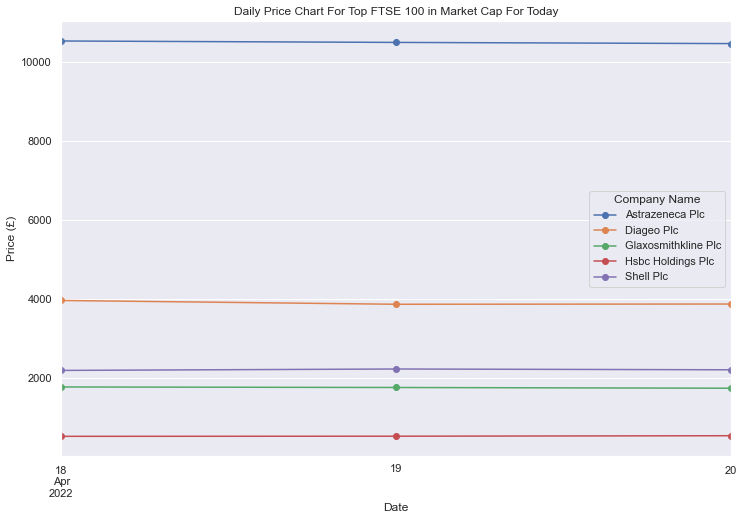

In [315]:
# data will become more populated as days pass
from matplotlib import rcParams

# make it bigger
rcParams['figure.figsize'] = 12,8

# plot
daily_plot.plot(marker='o')

# labelling
plt.title('Daily Price Chart For Top FTSE 100 in Market Cap For Today')
plt.xlabel('Date')
plt.ylabel("Price (£)")

##### What companies have the highest turnover on the 18th of April 2022

In [316]:
turnover_pivot = result.pivot_table('Turnover', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Turnover'], ascending=[False]).reset_index()
top_5_turnover_may_18_22 = turnover_pivot[turnover_pivot['Date'] == '2022-04-18'].head(5)
top_5_turnover_may_18_22

,Company Name,Date,Turnover
2,Shell Plc,2022-04-18,2.344532e+08
4,Astrazeneca Plc,2022-04-18,1.803387e+08
10,Hsbc Holdings Plc,2022-04-18,1.369114e+08
14,Glaxosmithkline Plc,2022-04-18,1.281644e+08
17,Glencore Plc,2022-04-18,1.238208e+08


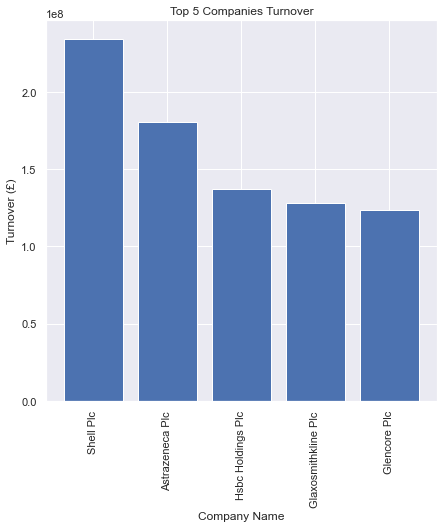

In [317]:
# plot a bar chart
plt.figure(figsize=(7,7))

turnover_x = top_5_turnover_may_18_22['Company Name']
turnover_y = top_5_turnover_may_18_22['Turnover']

plt.xlabel('Company Name')
plt.ylabel('Turnover (£)')
plt.title('Top 5 Companies Turnover')

plt.xticks(rotation=90)

plt.bar(turnover_x, turnover_y)
plt.show()

##### What companies saw the biggest percentage change (positive and negative) today

In [318]:
highest_positive_pc = result.pivot_table('Percentage Change', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Percentage Change'], ascending=[False]).reset_index()
highest_positive_pc = highest_positive_pc[highest_positive_pc['Date'] == today].head(1)
print(highest_positive_pc)

highest_negative_pc = result.pivot_table('Percentage Change', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Percentage Change'], ascending=[True]).reset_index()
highest_negative_pc = highest_negative_pc[highest_negative_pc['Date'] == today].head(1)
print(highest_negative_pc)

  Company Name       Date  Percentage Change
0      Crh Plc 2022-04-20               5.88
      Company Name       Date  Percentage Change
1  Ocado Group Plc 2022-04-20              -5.34


In [319]:
highest_p = highest_positive_pc['Percentage Change'].values[0]
highest_n = highest_negative_pc['Percentage Change'].values[0]

In [320]:
# plot box plot to show better representation
pchange_box = daily_FTSE.pivot_table('Percentage Change', index=['Company Name', 'Date']).sort_values(by='Percentage Change', ascending=False).reset_index()
pchange_box = pchange_box[pchange_box['Date'] == today]

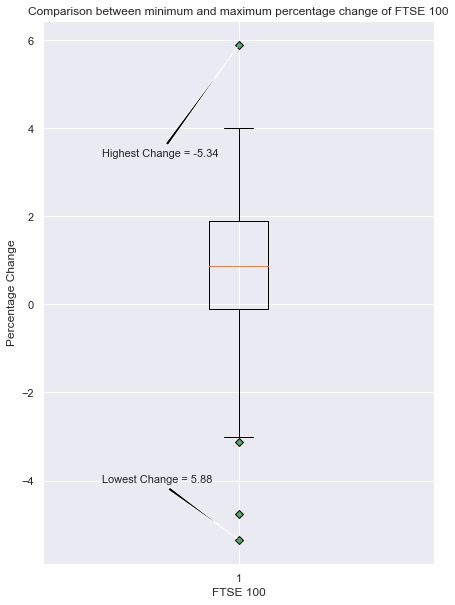

In [321]:
# plot box

# change outliers
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots(figsize=(7,10))
ax3.boxplot(pchange_box['Percentage Change'], flierprops=green_diamond)

ax3.set_title('Comparison between minimum and maximum percentage change of FTSE 100')
ax3.set_xlabel('FTSE 100')
ax3.set_ylabel('Percentage Change')

# annotate 
ax3.annotate(
    f'Lowest Change = {highest_p}',
    (1, highest_n),
    xytext=(0.15, 0.15),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)
ax3.annotate(
    f'Highest Change = {highest_n}',
    (1, highest_p),
    xytext=(0.15, 0.75),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)

plt.show()

##### What is the all time mean volume of FTSE 100

In [322]:
mean_volume = round(daily_FTSE['Volume'].mean())
mean_volume = f"{mean_volume:,}"
mean_volume_df = pd.DataFrame({'FTSE Mean Volume': [mean_volume]})
mean_volume_df

,FTSE Mean Volume
0,"13,977,347"


##### What company was issued the latest and has the highest market cap today

In [323]:
latest_company = result[['Date', 'Company Name', 'Issue Date', 'Market Cap (million)']]
latest_company = latest_company.sort_values(by=['Issue Date', 'Market Cap (million)'], ascending=[False,False]).reset_index()
latest_company = latest_company[latest_company['Date'] == today].head(5)
latest_company

,index,Date,Company Name,Issue Date,Market Cap (million)
2,384,2022-04-20,Shell Plc,2022-01-31,165015.10
7,346,2022-04-20,Jd Sports Fashion Plc,2021-11-30,7608.25
10,349,2022-04-20,Berkeley Group Holdings The Plc,2021-09-06,4439.91
14,317,2022-04-20,Melrose Industries Plc,2021-08-31,5373.72
19,341,2022-04-20,Endeavour Mining Plc,2021-06-14,5058.64


##### Compare the top company to the next 4 companies

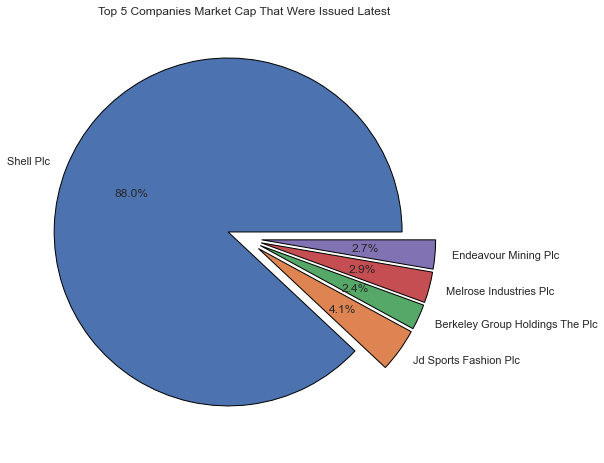

In [324]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(latest_company['Market Cap (million)'], labels=latest_company['Company Name'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Market Cap That Were Issued Latest')
plt.ticklabel_format(style='plain', axis='y')

##### What company has the highest turnover as well as positive earnings per share  today

In [325]:
turnover_eps = result[['Date', 'Company Name', 'Turnover', 'Earnings Per Share']]
turnover_eps_1 = turnover_eps[(turnover_eps['Earnings Per Share'] > 0) & (turnover_eps['Date'] == today)].sort_values(by=['Turnover', 'Earnings Per Share'], ascending=[False,False]).reset_index()
turnover_eps_1.head(5)

,index,Date,Company Name,Turnover,Earnings Per Share
0,384,2022-04-20,Shell Plc,2.425401e+08,2.59
1,398,2022-04-20,Rio Tinto Plc,1.816995e+08,13.03
2,377,2022-04-20,Astrazeneca Plc,1.517342e+08,0.08
3,313,2022-04-20,Hsbc Holdings Plc,1.383348e+08,0.62
4,370,2022-04-20,Bp Plc,1.375967e+08,0.38


#### What company has the highest product of turnover and earnings per share today

In [326]:
turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']
turnover_eps_2 = turnover_eps[turnover_eps['Date'] == today]
turnover_eps_2 = turnover_eps_2.sort_values(by='Turnover * EPS', ascending=False)
turnover_eps_2 = turnover_eps_2.head(5)
turnover_eps_2

<ipython-input-326-839af2414ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']


,Date,Company Name,Turnover,Earnings Per Share,Turnover * EPS
391,2022-04-20,Pershing Square Holdings Ltd,3.046394e+06,2017.00,6.144578e+09
318,2022-04-20,Prudential Plc,4.855412e+07,81.60,3.962017e+09
398,2022-04-20,Rio Tinto Plc,1.816995e+08,13.03,2.367545e+09
384,2022-04-20,Shell Plc,2.425401e+08,2.59,6.281789e+08
303,2022-04-20,Ferguson Plc,7.975396e+07,6.75,5.383392e+08


##### Compare the top company to the next 4 companies

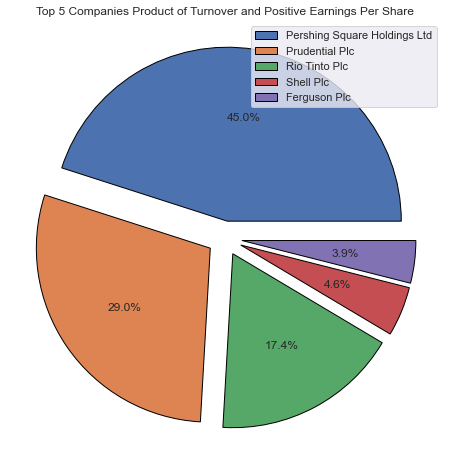

In [327]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(turnover_eps_2['Turnover * EPS'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Product of Turnover and Positive Earnings Per Share')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(turnover_eps_2['Company Name'])
plt.show()

## Historical FTSE 100 Analysis

###  Load data in

In [328]:
historical = pd.read_csv(r"C:\Users\Abdulkadir\Documents\Programming\Personal\DataScience\historicalftse100.csv")
historical

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 15, 2020","5,832.52","5,935.06","5,935.06","5,786.20",665.02M,-1.73%
1,"Oct 14, 2020","5,935.06","5,969.71","6,009.81","5,926.49",612.91M,-0.58%
2,"Oct 13, 2020","5,969.71","6,001.38","6,008.04","5,949.97",786.88M,-0.53%
3,"Oct 12, 2020","6,001.38","6,016.65","6,037.08","5,995.11",600.96M,-0.25%
4,"Oct 09, 2020","6,016.65","5,978.03","6,040.47","5,978.03",676.78M,0.65%
...,...,...,...,...,...,...,...
4994,"Jan 09, 2001","6,088.10","6,149.60","6,195.90","6,066.40",-,-1.00%
4995,"Jan 08, 2001","6,149.60","6,198.10","6,212.40","6,137.70",-,-0.78%
4996,"Jan 05, 2001","6,198.10","6,185.60","6,239.60","6,155.00",-,0.20%
4997,"Jan 04, 2001","6,185.60","6,039.90","6,195.30","6,039.90",-,2.41%


### Clean data

In [329]:
# change date to datetime
historical['Date'] = pd.to_datetime(historical['Date'])

In [330]:
# make new columns for month and year
historical['Month'] = historical['Date'].dt.month
historical['Year'] = historical['Date'].dt.year

####  remove M and B from vol and make it to a number

In [331]:
def converter(x):
    if 'M' in x:
        return f"{(float(x.strip('M'))*1000000):,.2f}"
    elif 'B' in x:
        return f"{(float(x.strip('B'))*1000000000):,.2f}"

In [332]:
# remove M and B from vol and make it to a number
historical['Vol.'] = historical['Vol.'].apply(lambda x: converter(x))

In [333]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73%,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58%,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53%,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25%,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65%,10,2020


##### remove percentage signs

In [334]:
historical['Change %'] = historical['Change %'].str.strip('%')

In [335]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65,10,2020


##### Change string to floats

In [336]:
historical_FTSE = historical

In [337]:
# the negative signs in earnings per share causing problems with conversion to float
historical_FTSE['Change %'] = historical_FTSE['Change %'].replace('-',np.nan)

In [338]:
# Change datatype of all strings that look like numbers to actual numbers
historical_FTSE[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']] = historical_FTSE[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].apply(lambda x: x.str.replace(',','').astype(float))
historical_FTSE

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,5832.52,5935.06,5935.06,5786.20,665020000.0,-1.73,10,2020
1,2020-10-14,5935.06,5969.71,6009.81,5926.49,612910000.0,-0.58,10,2020
2,2020-10-13,5969.71,6001.38,6008.04,5949.97,786880000.0,-0.53,10,2020
3,2020-10-12,6001.38,6016.65,6037.08,5995.11,600960000.0,-0.25,10,2020
4,2020-10-09,6016.65,5978.03,6040.47,5978.03,676780000.0,0.65,10,2020
...,...,...,...,...,...,...,...,...,...
4994,2001-01-09,6088.10,6149.60,6195.90,6066.40,NaN,-1.00,1,2001
4995,2001-01-08,6149.60,6198.10,6212.40,6137.70,NaN,-0.78,1,2001
4996,2001-01-05,6198.10,6185.60,6239.60,6155.00,NaN,0.20,1,2001
4997,2001-01-04,6185.60,6039.90,6195.30,6039.90,NaN,2.41,1,2001


### Analysis

#### Yearly price chart

In [339]:
historical_yearly = historical_FTSE.pivot_table('Price', index=['Date'])

In [340]:
# plot maximum price value
max_val = historical_yearly.sort_values('Price', ascending=False).reset_index().head(1)
max_val

,Date,Price
0,2018-05-22,7877.45


In [341]:
max_y1 = max_val['Price'][0]
max_x1 = max_val['Date'][0]

In [342]:
print(f'{max_x1}, {max_y1}')

2018-05-22 00:00:00, 7877.45


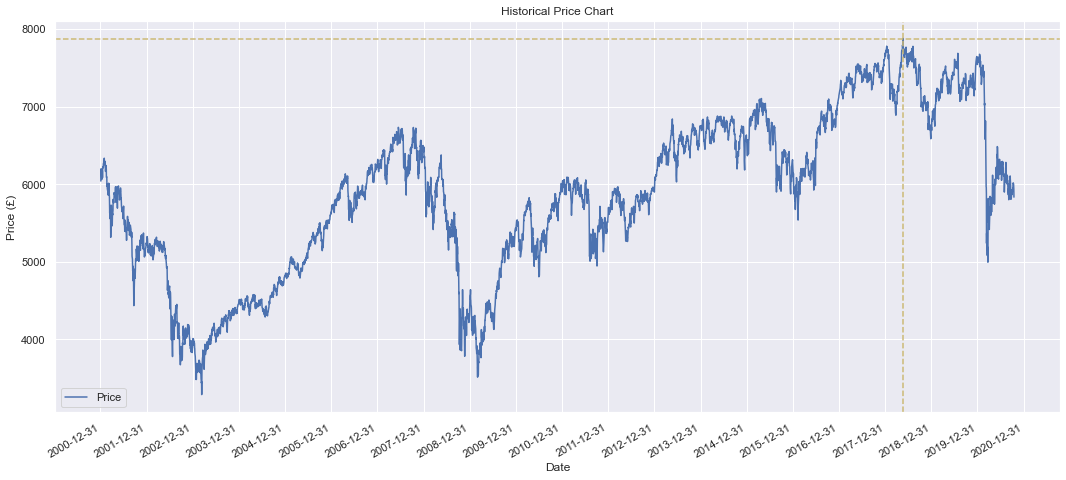

In [343]:
# make it bigger
rcParams['figure.figsize'] = 18,8

# plot
historical_yearly.plot()

# labelling
plt.title('Historical Price Chart')
plt.xlabel('Date')
plt.ylabel("Price (£)")

# x ticks
date_day = pd.date_range(start='2000-01-01', end='2021-10-15', freq='Y')
plt.xticks(date_day)

# horizontal and vertical line
plt.axhline(y=max_val['Price'][0], color='y', linestyle='--')
plt.axvline(x=max_val['Date'][0], color='y', linestyle='--')

# plot max val xticks


plt.show()

#### Volume Chart

In [344]:
# find out when the NaN stops
no_NaN = historical_FTSE[historical_FTSE['Vol.'].notnull()]
no_NaN

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,5832.52,5935.06,5935.06,5786.20,6.650200e+08,-1.73,10,2020
1,2020-10-14,5935.06,5969.71,6009.81,5926.49,6.129100e+08,-0.58,10,2020
2,2020-10-13,5969.71,6001.38,6008.04,5949.97,7.868800e+08,-0.53,10,2020
3,2020-10-12,6001.38,6016.65,6037.08,5995.11,6.009600e+08,-0.25,10,2020
4,2020-10-09,6016.65,5978.03,6040.47,5978.03,6.767800e+08,0.65,10,2020
...,...,...,...,...,...,...,...,...,...
2316,2011-08-18,5092.23,5331.60,5331.60,5041.59,1.180000e+09,-4.49,8,2011
2317,2011-08-17,5331.60,5357.63,5371.08,5279.93,6.719400e+08,-0.49,8,2011
2318,2011-08-16,5357.63,5350.58,5362.15,5265.83,7.163800e+08,0.13,8,2011
2319,2011-08-15,5350.58,5320.03,5377.23,5319.38,6.956400e+08,0.57,8,2011


In [345]:
historical_vol = no_NaN.pivot_table('Vol.', index=['Date'])

In [346]:
# plot maximum price value
max_vol = historical_FTSE.sort_values('Vol.', ascending=False).reset_index().head(1)
max_vol

,index,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,1091,2016-06-24,6138.69,6338.1,6338.55,5788.74,3.880000e+09,-3.15,6,2016


In [347]:
max_vol['Vol.'][0]

3880000000.0

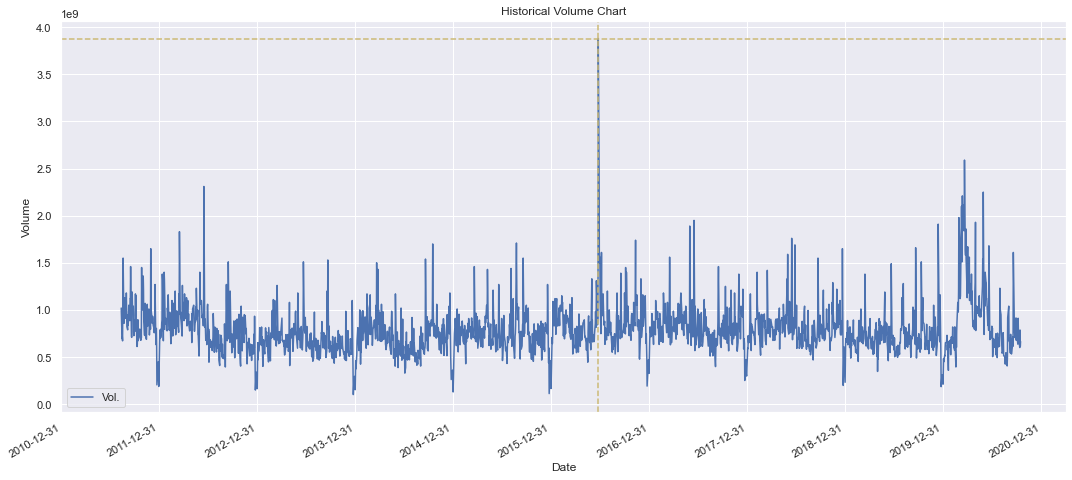

In [348]:
# make it bigger
rcParams['figure.figsize'] = 18,8

# plot
historical_vol.plot()

# labelling
plt.title('Historical Volume Chart')
plt.xlabel('Date')
plt.ylabel("Volume")

# x ticks
date_day = pd.date_range(start='2010-08-12', end='2021-10-15', freq='Y')
plt.xticks(date_day)

# horizontal and vertical line
plt.axhline(y=max_vol['Vol.'][0], color='y', linestyle='--')
plt.axvline(x=max_vol['Date'][0], color='y', linestyle='--')

plt.show()

#### What month is the price the highest of the year

In [349]:
per_month = historical_FTSE.groupby(['Month']).mean().reset_index()
per_month

,Month,Price,Open,High,Low,Vol.,Change %,Year
0,1,5938.003953,5941.402047,5977.467647,5900.656659,7.604087e+08,-0.057459,2010.522353
1,2,5917.639279,5918.167736,5953.681368,5879.598085,8.180693e+08,0.002687,2010.517413
2,3,5822.023449,5824.403542,5866.144653,5778.397523,9.386404e+08,-0.025949,2010.506944
3,4,5901.394433,5895.289421,5933.610378,5860.685164,8.268502e+08,0.122846,2010.488665
4,5,5964.860296,5965.437931,6002.620394,5926.326429,8.429388e+08,-0.005788,2010.470443
5,6,5887.908936,5891.361797,5928.814066,5850.321111,8.729252e+08,-0.058605,2010.546099
6,7,5873.702528,5871.406727,5911.319187,5833.943093,7.039049e+08,0.037269,2010.514673
7,8,5860.371324,5863.384610,5901.585532,5819.320071,7.051296e+08,-0.029314,2010.482270
8,9,5806.973991,5808.999155,5849.418850,5763.163451,7.933053e+08,-0.046761,2010.530516
9,10,5820.960161,5818.764977,5861.960760,5776.592028,7.848969e+08,0.058180,2010.255760


In [350]:
# change month from number to name
import calendar
per_month['Month'] = per_month['Month'].apply(lambda x: calendar.month_abbr[x])

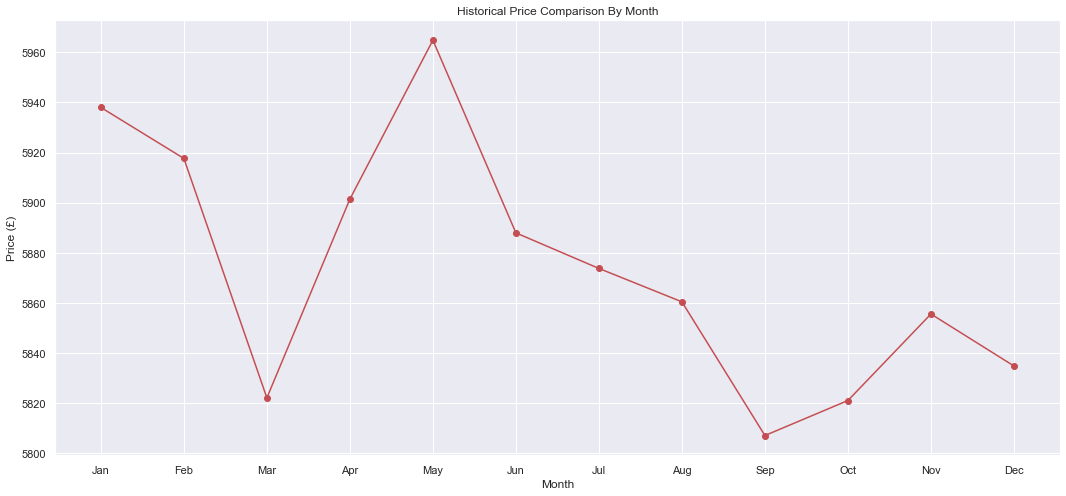

In [351]:
fig = plt.figure()
ax = plt.axes()

x = per_month['Month']
y = per_month['Price']


plt.plot(x, y, marker='o', color='r')

plt.title("Historical Price Comparison By Month")
plt.xlabel("Month")
plt.ylabel("Price (£)");